In [1]:
import pandas as pd
import numpy as np
import pyarrow
import os
import math
import re
from collections import Counter
import random
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

In [10]:
import powerlaw

In [2]:
path1 = r'E:\netData\APS\3 Paper\aps-papers-2010-CD5.zip'
path2 = r'E:\netData\APS\3 Paper\aps-papers-2010-SB.zip'
path3 = r'E:\netData\APS\3 Paper\nodepro2010.zip'

In [3]:
f1 = pd.read_csv(path1)
f2 = pd.read_csv(path2)
f3 = pd.read_csv(path3)

In [4]:
f2['CD5'] = f1['CD5']
f2['indegree'] = f3['indegree']
f2['cit5'] = f3['cit5']
f2['outdegree'] = f3['outdegree']
f2['year'] = f3['year']
f2['team size'] = f3['team size']
f2['first_cit_y'] = f3['first_cit_y']
f2['journal'] = f3['journal']
df = f2[f2['indegree']>10]
df = df[df['outdegree']>0]
df.index = range(len(df))
del df['id']

In [5]:
df['journal'] = df['journal'].map(dict(zip(df['journal'].unique() , np.concatenate([df['journal'].unique()[:7],np.array(['Physical Review']),df['journal'].unique()[8:]]))))

In [6]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["text.usetex"] = False

In [20]:
B   = df['B'].values
da  = df['da'].values
da = da[da>0]
CD5 = df['CD5'].values
CD5 = CD5+1

In [11]:
fit1 = powerlaw.Fit(df['B'].values)
fit2 = powerlaw.Fit(df['da'].values)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


In [15]:
dlst = [ 'B' , 'da' , 'CD5']
labellst = ['B',r'$\mathit{t}_{\mathit{\alpha}}$',r'CD$_5$']
fitlst = [fit1, fit2,fit3]

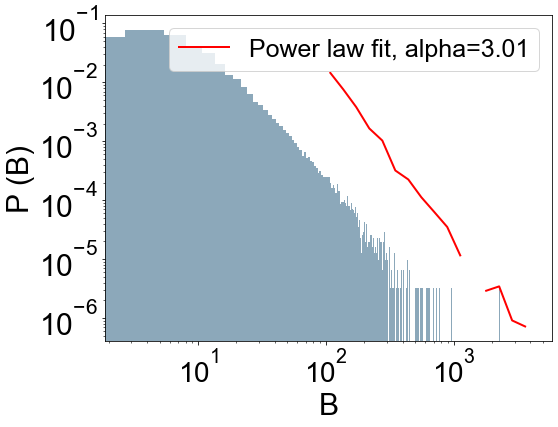

In [26]:
i = 0

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df[dlst[i]], bins=1500,  density=True, alpha=0.5, color='#1A5276')
fitlst[i].plot_pdf(color='red', ax=ax, linewidth=2, label=f'Power law fit, alpha={fitlst[i].alpha:.2f}')
ax.legend()
ax.set_xlabel(dlst[i] , fontsize=30)
ax.set_ylabel('P (' + labellst[i]+')' , fontsize=30)
plt.xticks(fontsize=28)
plt.yticks(fontsize=30)
plt.legend(fontsize = 25 )
plt.savefig(r"G:\A J YANG PAPER\APS analysis\Sciento SB CD\figs\fig 3\a3.pdf",bbox_inches = 'tight')

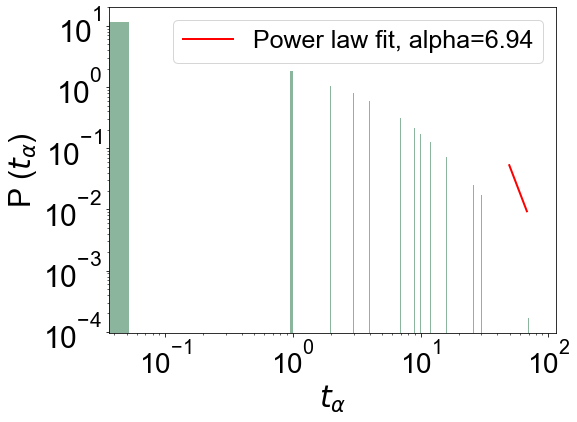

In [27]:
i = 1

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df[dlst[i]], bins=1500,  density=True, alpha=0.5, color='#196F3D')
fitlst[i].plot_pdf(color='red', ax=ax, linewidth=2, label=f'Power law fit, alpha={fitlst[i].alpha:.2f}')
ax.legend()
ax.set_xlabel(labellst[i] , fontsize=30)
ax.set_ylabel('P (' + labellst[i] +')', fontsize=30)
plt.xticks(fontsize=28)
plt.yticks(fontsize=30)
plt.legend(fontsize = 25 )
plt.savefig(r"G:\A J YANG PAPER\APS analysis\Sciento SB CD\figs\fig 3\b3.pdf",bbox_inches = 'tight')

In [23]:
CD5 = df['CD5'].values
CD51 = CD5[CD5>0]
CD52 = CD5[CD5<0]
CD52 = -CD52
fit3 = powerlaw.Fit(CD51)
fit4 = powerlaw.Fit(CD52)

Calculating best minimal value for power law fit


Calculating best minimal value for power law fit


In [24]:
df1 = df[df['CD5']>0]
df2 = df[df['CD5']<0]
df2['CD5'] = df2['CD5']*(-1)

C:\Users\nd\AppData\Local\Temp\ipykernel_10084\4005052754.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CD5'] = df2['CD5']*(-1)


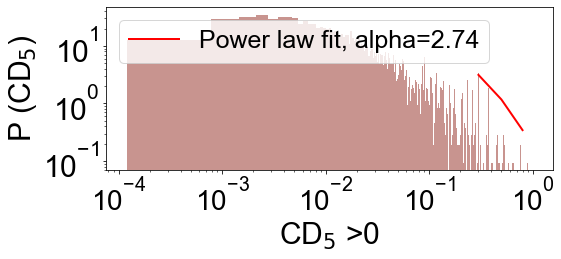

In [34]:
i = 2
fig, ax = plt.subplots(figsize=(8, 3))
ax.hist(df1['CD5'], bins=1500,  density=True, alpha=0.5, color='#922B21')
fitlst[i].plot_pdf(color='red', ax=ax, linewidth=2, label=f'Power law fit, alpha={fit3.alpha:.2f}')
ax.legend()
ax.set_xlabel(labellst[i]+' >0' , fontsize=30)
ax.set_ylabel('P (' +labellst[i] +')', fontsize=30)
plt.xticks(fontsize=28)
plt.yticks(fontsize=30)
plt.legend(fontsize = 25 )
plt.savefig(r"G:\A J YANG PAPER\APS analysis\Sciento SB CD\figs\fig 3\c31.png",bbox_inches = 'tight')

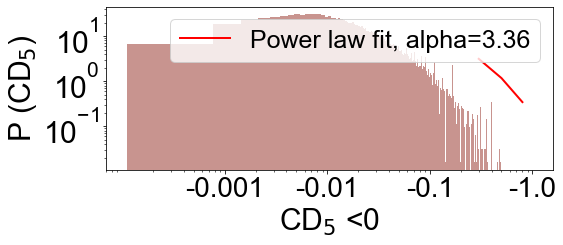

In [36]:
i = 2
fig, ax = plt.subplots(figsize=(8, 3))
ax.hist(df2['CD5'], bins=1500,  density=True, alpha=0.5, color='#922B21')
fitlst[i].plot_pdf(color='red', ax=ax, linewidth=2, label=f'Power law fit, alpha={fit4.alpha:.2f}')
ax.legend()
ax.set_xlabel(labellst[i]+' <0', fontsize=30)
ax.set_ylabel('P (' +labellst[i] +')', fontsize=30)
plt.xticks([10e-4,10e-3,10e-2,10e-1],[-10e-4,-10e-3,-10e-2,-10e-1],fontsize=28)
plt.yticks(fontsize=30)
plt.legend(fontsize = 25 )
plt.savefig(r"G:\A J YANG PAPER\APS analysis\Sciento SB CD\figs\fig 3\c32.png",bbox_inches = 'tight')